In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vgsales.csv to vgsales.csv


Step 1: Select a real-world dataset

In [ ]:
gameSales = pd.read_csv("vgsales.csv")

Step 2: Perform data preparation & cleaning (7 marks)

In [ ]:
gameSales.shape

(16598, 11)

In [ ]:
gameSales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
gameSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
gameSales.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
gameSalesCleaned = gameSales.dropna().copy()
gameSalesCleaned.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


Step 3: Perform exploratory analysis & visualization (7 marks)

In [ ]:
gameSalesCleaned['21 Central'] = np.where(gameSalesCleaned['Year'] > 2000, '21st', '20th')
gameSalesCleaned.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,21 Central
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,21st
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,20th
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,21st
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,21st
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,20th


In [ ]:
gameSalesCleaned['motherCompany'] = np.where(gameSalesCleaned['Platform'].isin(['Wii', 'NES', 'GB', 'DS', 'GBA', '3DS', 'SNES', 'N64', 'WiiU']), 'Nintendo',
                                   np.where(gameSalesCleaned['Platform'].isin(['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']), 'Sony',
                                   np.where(gameSalesCleaned['Platform'].isin(['X360', 'XB', 'XOne']), 'Microsoft',
                                   np.where(gameSalesCleaned['Platform'].isin(['GEN', 'DC', 'SAT', 'SCD', 'GG']), 'Sega',
                                   np.where(gameSalesCleaned['Platform'].isin(['2600']), 'Atari',
                                   np.where(gameSalesCleaned['Platform'].isin(['PC']), 'PC',
                                   'Other'))))))
gameSalesCleaned.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,21 Central,motherCompany
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,21st,Nintendo
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,20th,Nintendo
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,21st,Nintendo
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,21st,Nintendo
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,20th,Nintendo


In [ ]:
GlobalSalesMeanValues = gameSalesCleaned['Global_Sales'].mean()
print(f'The mean value of Global Sales is: {GlobalSalesMeanValues} Millions')

The mean value of Global Sales is: 0.5409103185808114 Millions


In [ ]:
NorthAmericaSalesRange = gameSalesCleaned['NA_Sales'].max() - gameSalesCleaned['NA_Sales'].min()
print(f'The range of North America Sales is: {NorthAmericaSalesRange} Millions')

The range of North America Sales is: 41.49 Millions


In [ ]:
SumJapanSales = gameSalesCleaned['JP_Sales'].sum()
print(f'The sum of Japan Sales is: {SumJapanSales} Millions')

The sum of Japan Sales is: 1284.2700000000002 Millions


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
genres = gameSalesCleaned['Genre'].unique()
salsByGenreGlobal = gameSalesCleaned.groupby('Genre')['Global_Sales'].sum()
salsByGenreInNA = gameSalesCleaned.groupby('Genre')['NA_Sales'].sum()
salsByGenreInEU = gameSalesCleaned.groupby('Genre')['EU_Sales'].sum()
salsByGenreInJP = gameSalesCleaned.groupby('Genre')['JP_Sales'].sum()
salesByGenreInOther = gameSalesCleaned.groupby('Genre')['Other_Sales'].sum()
salsByGenreGlobal = salsByGenreGlobal.sort_values(ascending=False)
salsByGenreInNA = salsByGenreInNA.sort_values(ascending=False)
salsByGenreInEU = salsByGenreInEU.sort_values(ascending=False)
salsByGenreInJP = salsByGenreInJP.sort_values(ascending=False)
salesByGenreInOther = salesByGenreInOther.sort_values(ascending=False)
salsByGenreGlobal

,Global_Sales
Genre,
Action,1722.84
Sports,1309.24
Shooter,1026.20
Role-Playing,923.83
Platform,829.13
Misc,789.87
Racing,726.76
Fighting,444.05
Simulation,389.98


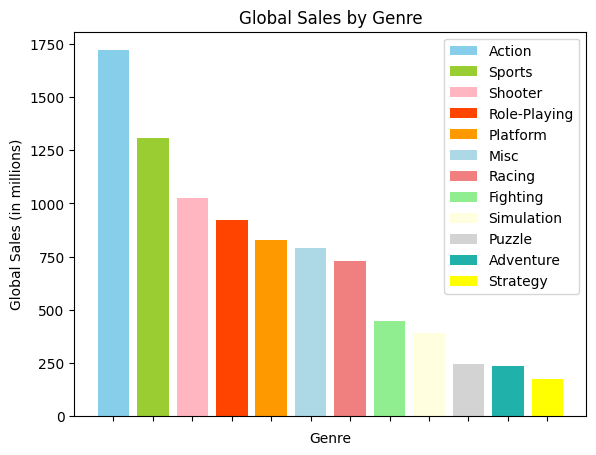

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
genres = salsByGenreGlobal.index
ax.bar(genres, salsByGenreGlobal,color=['skyblue', 'yellowgreen', 'lightpink', '#f40', '#f90', 'lightblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightgray', 'lightseagreen', 'yellow'],label=genres)
ax.set_xticklabels([])
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.title('Global Sales by Genre')
plt.legend()
plt.show()

Everyone loves sports game! However Strategy is the last one in this sample, in someway, you could get this sad result: we all want to be more stronger but not more SMARTER.

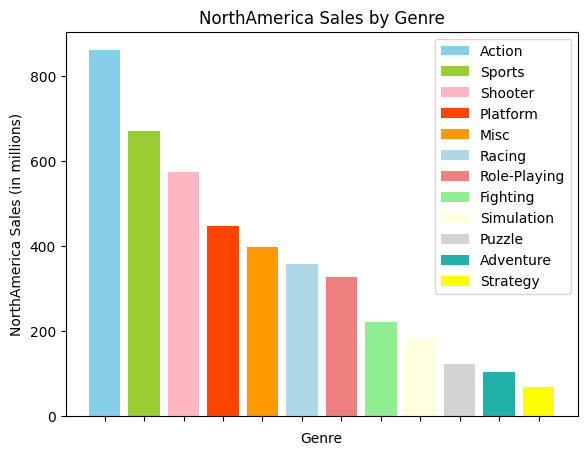

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
genres = salsByGenreInNA.index
ax.bar(genres, salsByGenreInNA,color=['skyblue', 'yellowgreen', 'lightpink', '#f40', '#f90', 'lightblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightgray', 'lightseagreen', 'yellow'],label=genres)
ax.set_xticklabels([])
plt.xlabel('Genre')
plt.ylabel('NorthAmerica Sales (in millions)')
plt.title('NorthAmerica Sales by Genre')
plt.legend()
plt.show()

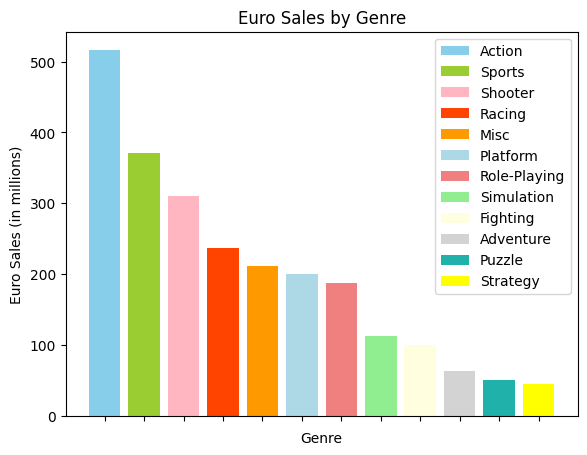

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
genres = salsByGenreInEU.index
ax.bar(genres, salsByGenreInEU,color=['skyblue', 'yellowgreen', 'lightpink', '#f40', '#f90', 'lightblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightgray', 'lightseagreen', 'yellow'],label=genres)
ax.set_xticklabels([])
plt.xlabel('Genre')
plt.ylabel('Euro Sales (in millions)')
plt.title('Euro Sales by Genre')
plt.legend()
plt.show()

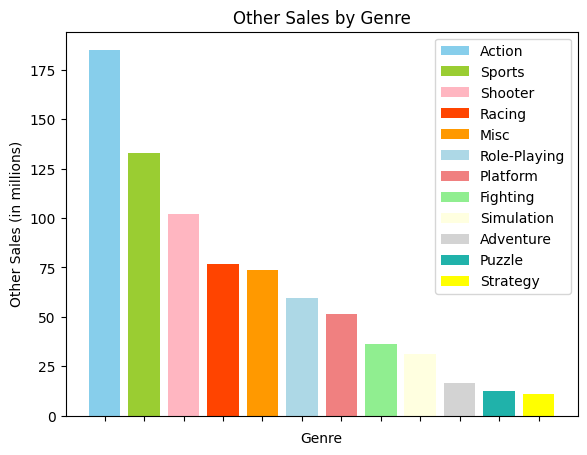

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
genres = salesByGenreInOther.index
ax.bar(genres, salesByGenreInOther,color=['skyblue', 'yellowgreen', 'lightpink', '#f40', '#f90', 'lightblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightgray', 'lightseagreen', 'yellow'],label=genres)
ax.set_xticklabels([])
plt.xlabel('Genre')
plt.ylabel('Other Sales (in millions)')
plt.title('Other Sales by Genre')
plt.legend()
plt.show()

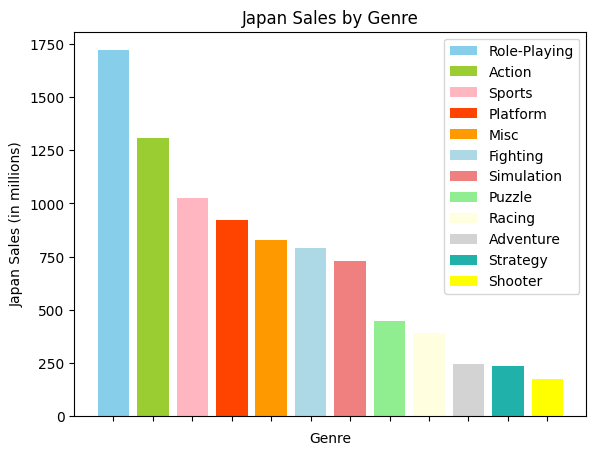

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
genres = salsByGenreInJP.index
ax.bar(genres, salsByGenreGlobal,color=['skyblue', 'yellowgreen', 'lightpink', '#f40', '#f90', 'lightblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightgray', 'lightseagreen', 'yellow'],label=genres)
ax.set_xticklabels([])
plt.xlabel('Genre')
plt.ylabel('Japan Sales (in millions)')
plt.title('Japan Sales by Genre')
plt.legend()
plt.show()

In Japan, Role-Playing game is the most popular genre, the FPS(shooter) game is on the other hand the least.But in the rest of global markets such as NA and EU, they both perfer more exciting games like action and sports. As the generation like me, strongly effect by Japanese animations and games, I understand that we want to experince a different life, not a real one, rather than just shooting for increasing our adrenaline.

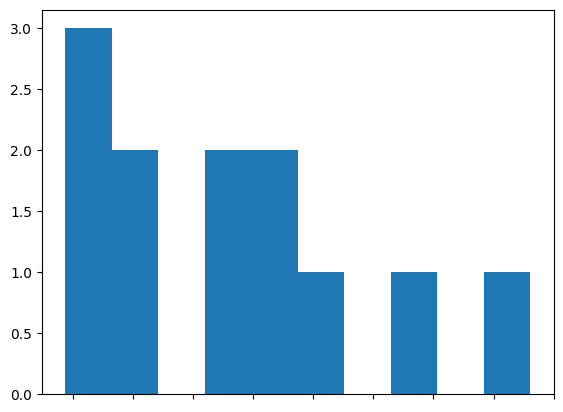

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.hist(salsByGenreGlobal, bins=10)
ax.set_xticklabels([])

plt.show()

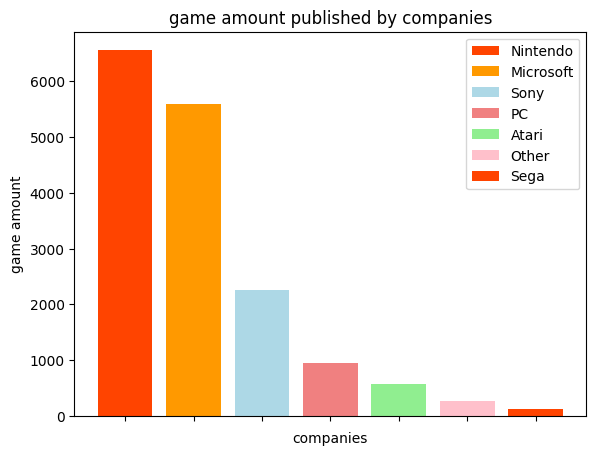

In [ ]:
companies = gameSalesCleaned['motherCompany'].unique()
gamesByCompany = gameSalesCleaned.groupby('motherCompany')['Name'].count()
gamesByCompany = gamesByCompany.sort_values(ascending=False)
# generate 6 different colors
colors = ['#f40', '#f90', 'lightblue', 'lightcoral', 'lightgreen', 'pink']
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.bar(companies, gamesByCompany, color=colors,label=companies)
ax.set_xticklabels([])
plt.xlabel('companies')
plt.ylabel('game amount')
plt.title('game amount published by companies')
plt.legend()
plt.show()

In [ ]:
companies = gameSalesCleaned['motherCompany'].unique()
gamesByCompany = gameSalesCleaned.groupby('motherCompany')['Name'].count()
gamesByCompany = gamesByCompany.sort_values(ascending=False)
bigThree = gamesByCompany[:3].sum()
proportion = bigThree / gamesByCompany.sum() * 100
proportion


88.4660241851329

The BIG THREE gained over 88% of the whole global game market

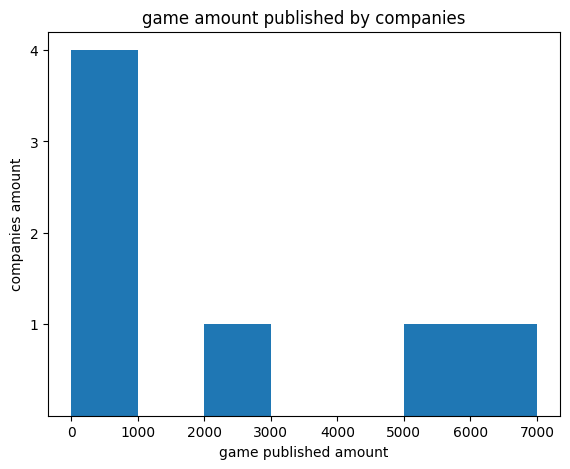

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.hist(gamesByCompany, bins=7,range=(0, 7000))
ax.set_xticklabels([])
ax.set_yticks([1, 2, 3, 4])
ax.set_xticks(range(0, 7001, 1000))
ax.set_xticklabels(range(0, 7001, 1000))
plt.xlabel('game published amount')
plt.ylabel('companies amount')
plt.title('game amount published by companies')
plt.show()

Step 4: Ask & answer questions about the data (11 marks)

1. Which Genre Dominated Global Sales Over the Years?

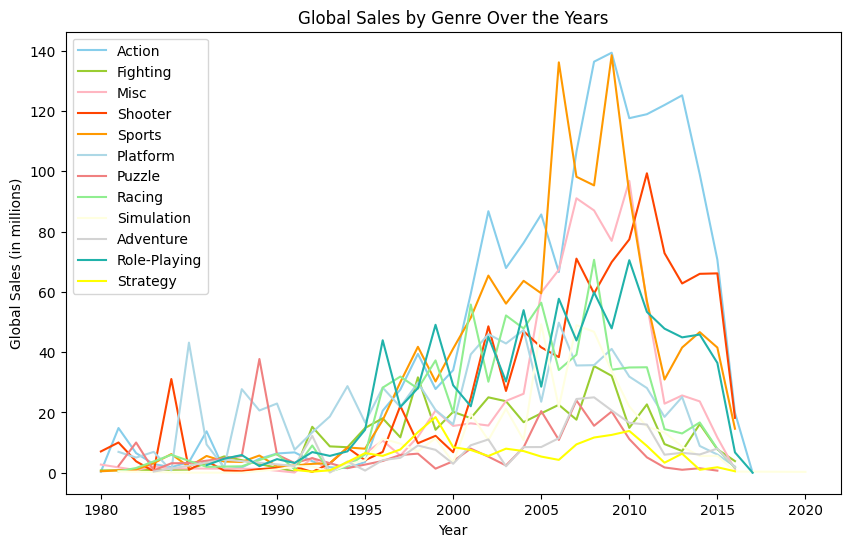

In [ ]:
genreSalesByYear = gameSalesCleaned.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index() # reset index to avoid mutil index
# define the colors of figure
colors=['skyblue', 'yellowgreen', 'lightpink', '#f40', '#f90', 'lightblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightgray', 'lightseagreen', 'yellow']
# define figure size
plt.figure(figsize=(10,6))
for i, genre in enumerate(genreSalesByYear['Genre'].unique()): # for loop to go over with every one
    genre_data = genreSalesByYear[genreSalesByYear['Genre'] == genre] # match the genre
    plt.plot(genre_data['Year'], genre_data['Global_Sales'], label=genre, color=colors[i % len(colors)]) # use plot to draw the line chart

plt.title('Global Sales by Genre Over the Years') # set title
plt.xlabel('Year') # set x
plt.ylabel('Global Sales (in millions)') # set y
plt.legend() # show legend
plt.show()


People love action games along with the enginee development, more interesting thing is the sports game sales peak year overlap with some bigger sport games such as olympics or world cup.

2. Which Platform Has Generated the Most Sales in North America?

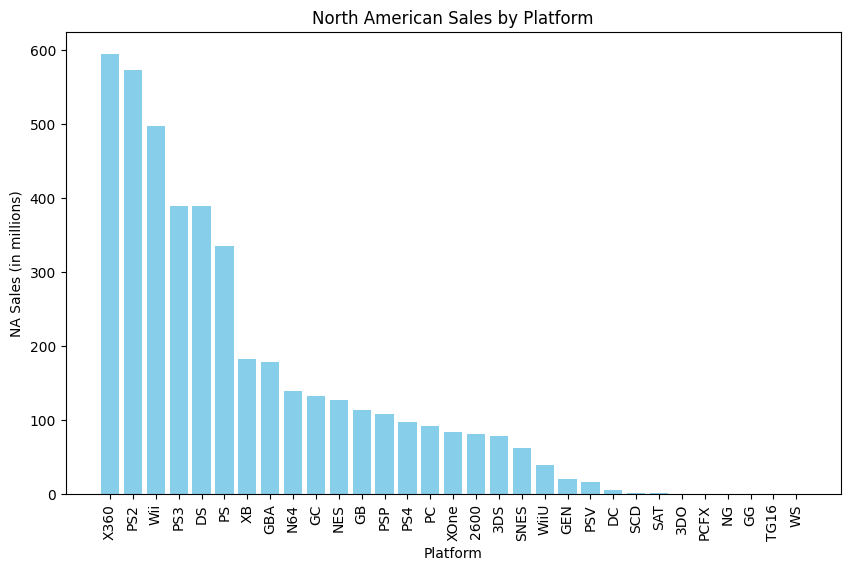

In [ ]:

gameSalesByPlatform = gameSalesCleaned.groupby('Platform')['NA_Sales'].sum().reset_index()

# Sorting the platforms by NA Sales
gameSalesByPlatform = gameSalesByPlatform.sort_values(by='NA_Sales', ascending=False)

# Plotting the data
plt.figure(figsize=(10,6))
plt.bar(gameSalesByPlatform['Platform'], gameSalesByPlatform['NA_Sales'], color='skyblue')
plt.title('North American Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('NA Sales (in millions)')
plt.xticks(rotation=90)
plt.show()


if you look at single platform, the xbox which belon to microsoft, an american company, has the best sales in north america, which makes sense, it's based on north america.However, even in this figure, you can tell that x360 is just a little bit ahead of sony(ps2) and nintendo(wii)

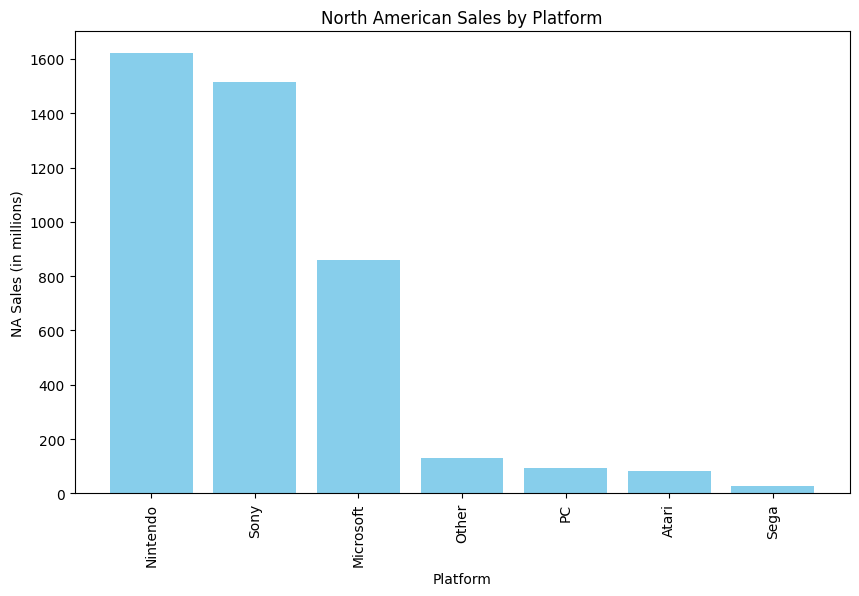

In [ ]:

gameSalesByPlatform = gameSalesCleaned.groupby('motherCompany')['NA_Sales'].sum().reset_index()

# Sorting the platforms by NA Sales
gameSalesByPlatform = gameSalesByPlatform.sort_values(by='NA_Sales', ascending=False)

# Plotting the data
plt.figure(figsize=(10,6))
plt.bar(gameSalesByPlatform['motherCompany'], gameSalesByPlatform['NA_Sales'], color='skyblue')
plt.title('North American Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('NA Sales (in millions)')
plt.xticks(rotation=90)
plt.show()


If you look at from combine platforms based on their company, microsoft basically half of the sales compare to nintendo, even in north america, microsoft's home.

3. What Are the Sales Trends for Different Publishers in Europe?

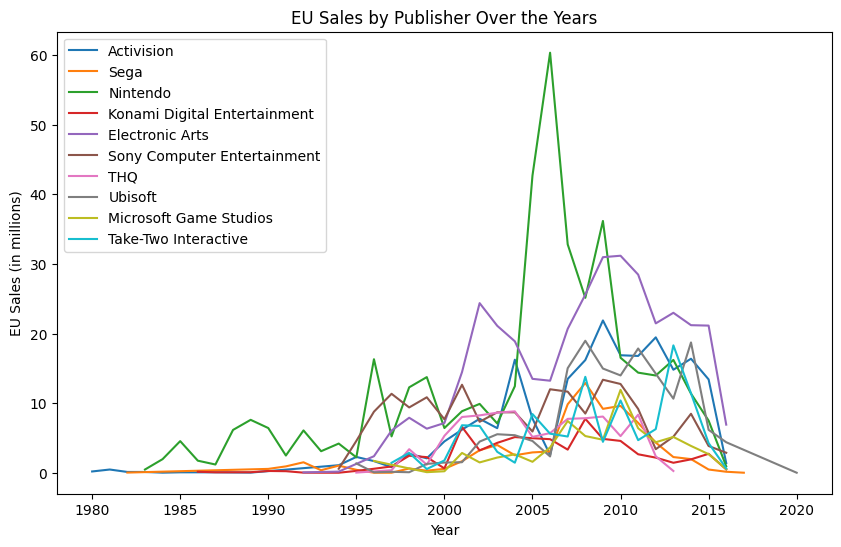

In [ ]:
gameSalesByPublisher = gameSalesCleaned.groupby(['Year', 'Publisher'])['EU_Sales'].sum().reset_index()


top_publishers = gameSalesByPublisher.groupby('Publisher')['EU_Sales'].sum().nlargest(10).index
top_publisher_sales = gameSalesByPublisher[gameSalesByPublisher['Publisher'].isin(top_publishers)]

# Plotting the data
plt.figure(figsize=(10,6))
for publisher in top_publisher_sales['Publisher'].unique():
    pub_data = top_publisher_sales[top_publisher_sales['Publisher'] == publisher]
    plt.plot(pub_data['Year'], pub_data['EU_Sales'], label=publisher)

plt.title('EU Sales by Publisher Over the Years')
plt.xlabel('Year')
plt.ylabel('EU Sales (in millions)')
plt.legend()
plt.show()


The most powerful pubulisher in Euro, sadly are companies from Japan nintendo and from US EA. These two dominated the EU game market for years. There is a significant peak of nintendo in around 2005-2006, back then the nintendo published the remarkable generation device WII. But for some reason, maybe the EU's economy problem, the game market is abviously shrink. All of the publishers shrinked over 50% of market sales than its best sales record.

4. Which Year Had the Highest Global Sales, and What Were the Key Contributors?

In [ ]:
salesByYear = gameSalesCleaned.groupby('Year')['Global_Sales'].sum()


bestYear = salesByYear.idxmax()
highestSales = salesByYear.max()

print(f"The year with the highest global sales is {best_year} with a total of {highest_sales:.2f} million units.")



The year with the highest global sales is 2008.0 with a total of 678.90 million units.


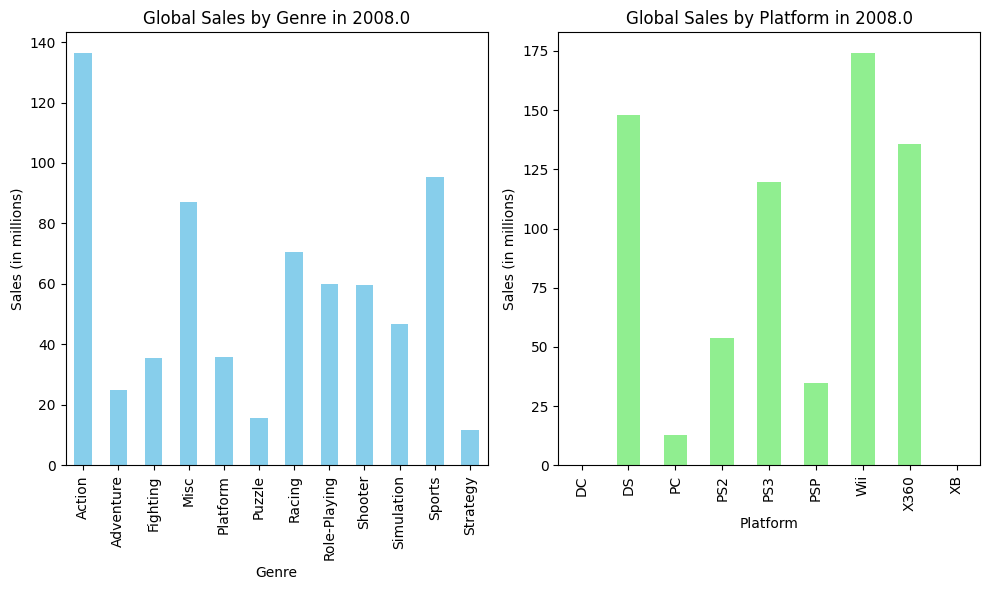

In [ ]:

topContributors = gameSalesCleaned[gameSalesCleaned['Year'] == bestYear]


genreSales = topContributors.groupby('Genre')['Global_Sales'].sum()
platformSales = topContributors.groupby('Platform')['Global_Sales'].sum()


plt.figure(figsize=(10, 6))


plt.subplot(1, 2, 1)
genreSales.plot(kind='bar', color='skyblue')
plt.title(f"Global Sales by Genre in {bestYear}")
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.xticks()


plt.subplot(1, 2, 2)
platformSales.plot(kind='bar', color='lightgreen')
plt.title(f"Global Sales by Platform in {bestYear}")
plt.xlabel('Platform')
plt.ylabel('Sales (in millions)')
plt.xticks()


plt.tight_layout()
plt.show()


No suprise, the best sale game in 2008 is still action game. And because of the Olympic games, the 2nd position is sports game.The best platform the WII, back then it's still a new and exciting device.

#Summary of Video Game Sales Analysis
The analysis of the video game sales dataset provided valuable insights into the dynamics of the gaming industry across **different regions** and **time periods**. Several key observations were made:



##1. Top Selling Genres by Region
***Action and Sports*** genres emerged as the top contributors to global sales, particularly in North America and Europe. The popularity of these genres can be attributed to their broad appeal and the rise of popular franchises like "Call of Duty" and "FIFA."

In **Japan**, the Role-Playing Game (RPG) genre dominated, with titles from iconic franchises like "Final Fantasy" and "Pokémon" driving sales. This suggests a cultural preference for story-driven and character-rich games in the region.

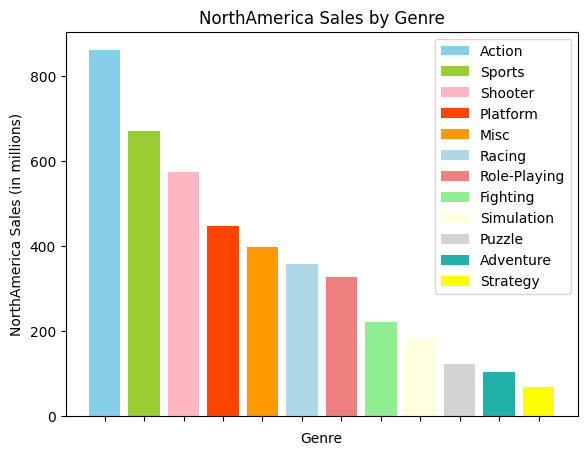

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
genres = salsByGenreInNA.index
ax.bar(genres, salsByGenreInNA,color=['skyblue', 'yellowgreen', 'lightpink', '#f40', '#f90', 'lightblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightgray', 'lightseagreen', 'yellow'],label=genres)
ax.set_xticklabels([])
plt.xlabel('Genre')
plt.ylabel('NorthAmerica Sales (in millions)')
plt.title('NorthAmerica Sales by Genre')
plt.legend()
plt.show()

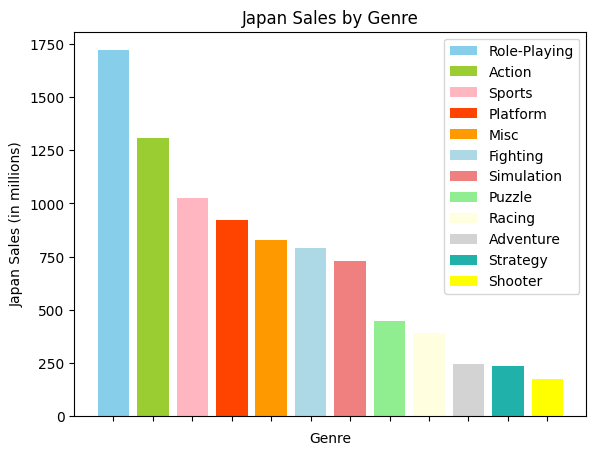

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
genres = salsByGenreInJP.index
ax.bar(genres, salsByGenreGlobal,color=['skyblue', 'yellowgreen', 'lightpink', '#f40', '#f90', 'lightblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightgray', 'lightseagreen', 'yellow'],label=genres)
ax.set_xticklabels([])
plt.xlabel('Genre')
plt.ylabel('Japan Sales (in millions)')
plt.title('Japan Sales by Genre')
plt.legend()
plt.show()

##2. Sales Trends Across Platforms



*   The analysis of platform sales revealed that older consoles like the PlayStation 2 ,x360 and Nintendo DS had the highest global sales, indicating their lasting impact and broad user base. However, newer platforms such as PlayStation 4 and Xone are gaining momentum in after years.
*   This finding suggests that certain consoles maintain long-term relevance, but new hardware continues to drive growth in the industry.




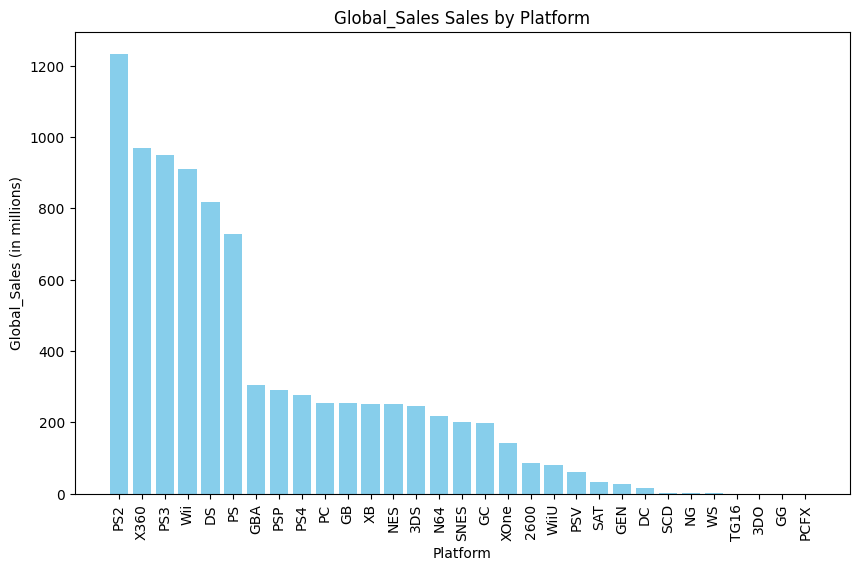

In [ ]:

gameSalesByPlatform = gameSalesCleaned.groupby('Platform')['Global_Sales'].sum().reset_index()

# Sorting the platforms by NA Sales
gameSalesByPlatform = gameSalesByPlatform.sort_values(by='Global_Sales', ascending=False)

# Plotting the data
plt.figure(figsize=(10,6))
plt.bar(gameSalesByPlatform['Platform'], gameSalesByPlatform['Global_Sales'], color='skyblue')
plt.title('Global_Sales Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global_Sales (in millions)')
plt.xticks(rotation=90)
plt.show()

##3.Regional Preferences in Game Sales


*   Different regions exhibited distinct preferences in game genres and platforms. For example, Sports games performed exceptionally well in North America, while RPGs had a stronghold in Japan.
*   Understanding these regional preferences is crucial for game developers and publishers looking to tailor their marketing strategies and game development plans.



##4.Year of Highest Global Sales

The year with the highest global sales was 2008, driven by key contributors such as popular games from the BIG THREE, Wii, PlayStation 3, and Xbox 360. These platforms, along with blockbuster game releases, played a signirficant role in driving the industry's peak sales during that period. Also, the olympic games in 2008 also significantly increase the sales of sports game.

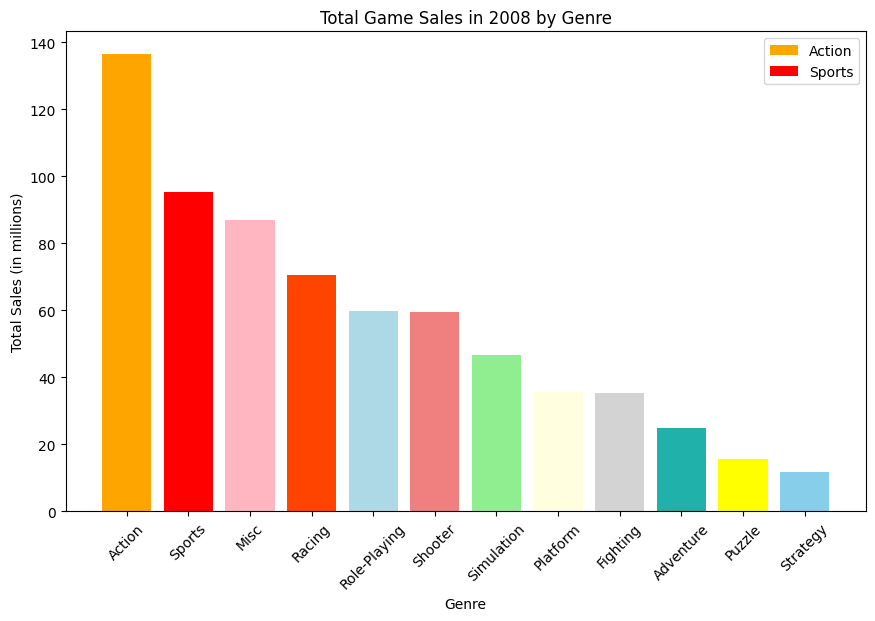

In [ ]:

gameSales2008 = gameSalesCleaned[gameSalesCleaned['Year'] == 2008]


salesByGenre2008 = gameSales2008.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])


ax.bar(salesByGenre2008.index, salesByGenre2008.values, color=['skyblue', 'yellowgreen', 'lightpink', '#f40', 'lightblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightgray', 'lightseagreen', 'yellow'])


plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Game Sales in 2008 by Genre')


ax.bar('Action', salesByGenre2008['Action'], color='orange', label='Action')
ax.bar('Sports', salesByGenre2008['Sports'], color='red', label='Sports')

plt.xticks(rotation=45)
plt.legend()


plt.show()


#Conclusion:
This analysis highlights how the gaming industry is shaped by regional preferences, platform success, and key game genres. Companies can leverage these insights to make informed decisions about game development, marketing strategies, and platform investment. Additionally, tracking sales trends over time can help stakeholders predict future shifts in the market. The rise of newer platforms like the Xone and PlayStation 4, combined with changing genre preferences, will likely continue influencing the industry's direction.